<h3> Adaptive Boosting(Adaboost)</h3>  <br> 
Adaboost 是自我提昇（boosting)的技術，是機器學習中總體(ensemble或翻譯"集成")方法之一
,其演算法如下：<br>

<p> 給定$N$個訓練資料 $\{{\bf{x}}_n,y_{n}\}$,其中$y_{n}\in \{+1,-1\}$,給定弱分類器$h_{t},1\le t\le T$.</p>
    <ol>    
    <li> 初始化每個訓練資料${\bf{x}}_n$的權重為$w_{1}(n)=\frac{1}{N}$ </li>
    <li> for $t =1...T$  </li>
    <ul type="i">
    <li style="margin-left:40px">使用$\{w_t(n)\}$訓練$h_{t}$使得加權的分類錯誤$\epsilon_t$最小,i.e. minimizing $ \epsilon_t=\sum_{n=1}^{N}w_t(n)I(y_n\neq h_t(n))$,其中 $I(u)=1$, 若$u$為真,否則$I(u)=0$</li>
    <li style="margin-left:40px"> 計算分類器 $h_{t}$的權重$\alpha_t=\frac{1}{2}\log(\frac{1-\epsilon_{t}}{\epsilon_{t}})$ </li>
    <li style="margin-left:40px"> $w_{t+1}(n)=\frac{w_{t}(n)}{Z_{t}}exp(-\alpha_{t}y_{n}h_{t}({\bf{x}}_n))$,                $n=1...N, Z_t=\sum_{n=1}^{N}w_{t}(n)exp(-\alpha_{t}y_{n}h_{t}({\bf{x}}_n))$ </li>
    <li style="margin-left:40px"> if $\epsilon_t=0$, then $T=t$; break
    </ul>
    <li> 輸出類器$h({\bf{x}})=sign(\sum_{t=1}^{T}\alpha_{t}h_{t}({\bf{x}}))$
    </ol>
    note:一般選用depth＝1的決策樹(aka tee stump 樹樁)為弱分類器

請用adaboost演算法，選用depth＝1的決策樹(aka tee stump 樹樁)為弱分類器，對資料集$\mathcal{D}= \{ [(0,0), 1],[(1,0),-1],[(1,1),1],[(0,1),-1)]\}$
依次計算資料和分類器的權重，並用matpltlib畫出決策邊界。

高度為一分不出來至少高度要二才分得出來


第0個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第1個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第2個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第3個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第4個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第5個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第6個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第7個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第8個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第9個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第10個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第11個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第12個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第13個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第14個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第15個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第16個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第17個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第18個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第19個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第20個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第21個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第22個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第23個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第24個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第25個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第26個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第27個分類器各樣本權重[0.25 0.25 0.25 0.25]：
第28個分類器各樣本權重[0.25 0.25 0.25 0.

Text(0.5, 1.0, 'Decision Boundary')

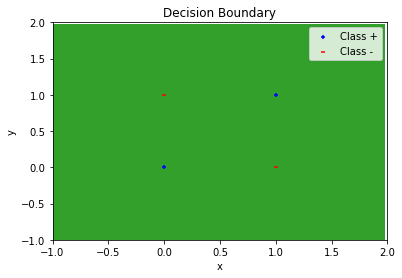

In [18]:
#樹高為一
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import math
# 資料集
X = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
y = np.array([1, -1, 1, -1])
#輸入筆數
num = y.shape[0] 
# 初始化權重
#weights = [np.ones(len(y)) / len(y)]
weights = np.array([1/num for i in range(num)])

# 初始化弱分類器
classifiers = []
cnt=60
# 訓練弱分類器

for t in range(cnt):
    print(f"第{t}個分類器各樣本權重{weights}：")
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X, y, sample_weight=weights)
    y_pred = clf.predict(X)
    #計算分類錯誤
    err = 0.0
    for n in range(num):
        if(y_pred[n] != y[n]):
            err += weights[n]
    #err = np.dot(weights[t], y_pred != y)
    if err==0:
       cnt=t+1
       break

     #計算分類器權重
    alpha = 0.5 * np.log((1 - err) / err)
    #更新權重
    n_a=0.0
    for n in range(num):
        n_a+= weights[n]*math.exp(-1*alpha*y[n]*y_pred[n])
    for n in range(num):
        weights[n]*=math.exp(-1*alpha*y[n]*y_pred[n])/n_a
    #weights[t+1]=weights[t] * np.exp(-alpha * y_pred * y)
    #weights[t + 1] = weights[t + 1] / np.sum(weights[t + 1])
    #print(weights) # 在每輪迭代後印出weights的值
    classifiers.append(clf)
y_pred = clf.predict(X)
print(y_pred)
#繪圖
plot_colors = "br"
plot_step = 0.02
class_names = "+-"
markers='+_'

# 繪製決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
print(Z)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

# 畫訓練點
for i, n, c,m in zip(range(1,-2,-2), class_names, plot_colors,markers):
    idx = np.where(y == i)
    print(idx)
    plt.scatter(X[idx, 0], X[idx, 1],marker=m,
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')



第0個分類器各樣本權重[0.25 0.25 0.25 0.25]：
[ 1 -1  1 -1]
[[ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 [ 1  1  1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ...  1  1  1]
 [-1 -1 -1 ...  1  1  1]
 [-1 -1 -1 ...  1  1  1]]
(array([0, 2], dtype=int64),)
(array([1, 3], dtype=int64),)


Text(0.5, 1.0, 'Decision Boundary')

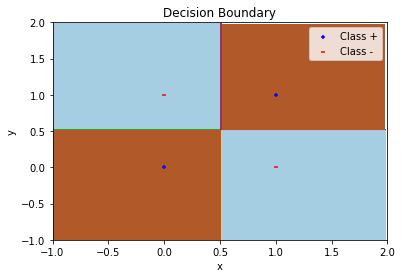

In [19]:
#樹高為二
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import math
# 資料集
X = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
y = np.array([1, -1, 1, -1])
#輸入筆數
num = y.shape[0] 
# 初始化權重
#weights = [np.ones(len(y)) / len(y)]
weights = np.array([1/num for i in range(num)])

# 初始化弱分類器
classifiers = []
cnt=60
# 訓練弱分類器

for t in range(cnt):
    print(f"第{t}個分類器各樣本權重{weights}：")
    clf = DecisionTreeClassifier(max_depth=2)
    clf.fit(X, y, sample_weight=weights)
    y_pred = clf.predict(X)
    #計算分類錯誤
    err = 0.0
    for n in range(num):
        if(y_pred[n] != y[n]):
            err += weights[n]
    #err = np.dot(weights[t], y_pred != y)
    if err==0:
       cnt=t+1
       break

     #計算分類器權重
    alpha = 0.5 * np.log((1 - err) / err)
    #更新權重
    n_a=0.0
    for n in range(num):
        n_a+= weights[n]*math.exp(-1*alpha*y[n]*y_pred[n])
    for n in range(num):
        weights[n]*=math.exp(-1*alpha*y[n]*y_pred[n])/n_a
    #weights[t+1]=weights[t] * np.exp(-alpha * y_pred * y)
    #weights[t + 1] = weights[t + 1] / np.sum(weights[t + 1])
    #print(weights) # 在每輪迭代後印出weights的值
    classifiers.append(clf)
y_pred = clf.predict(X)
print(y_pred)
#繪圖
plot_colors = "br"
plot_step = 0.02
class_names = "+-"
markers='+_'

# 繪製決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
print(Z)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

# 畫訓練點
for i, n, c,m in zip(range(1,-2,-2), class_names, plot_colors,markers):
    idx = np.where(y == i)
    print(idx)
    plt.scatter(X[idx, 0], X[idx, 1],marker=m,
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

